<a href="https://colab.research.google.com/github/shaolinxx/shaolinxx-retail/blob/main/retail_segment_profit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving customer_shopping_data.csv to customer_shopping_data.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
df.dtypes

,0
invoice_no,object
customer_id,object
gender,object
age,int64
category,object
quantity,int64
price,float64
payment_method,object
invoice_date,object
shopping_mall,object


In [ ]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [ ]:
df['category'].value_counts()


,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

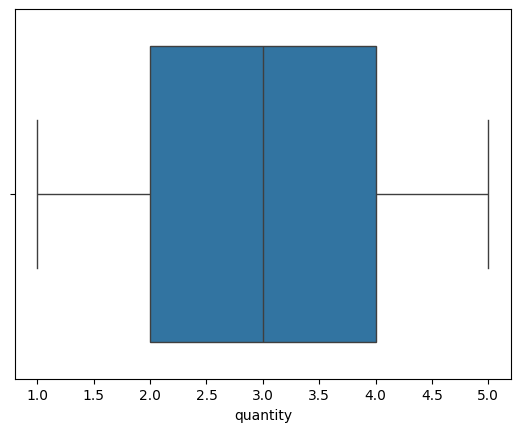

In [ ]:
sns.boxplot(x=df['quantity'])
plt.show()

In [ ]:
best_seller = df.groupby('category')['quantity'].sum().sort_values(ascending=False)
print(best_seller.head())


category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Toys                30321
Shoes               30217
Name: quantity, dtype: int64


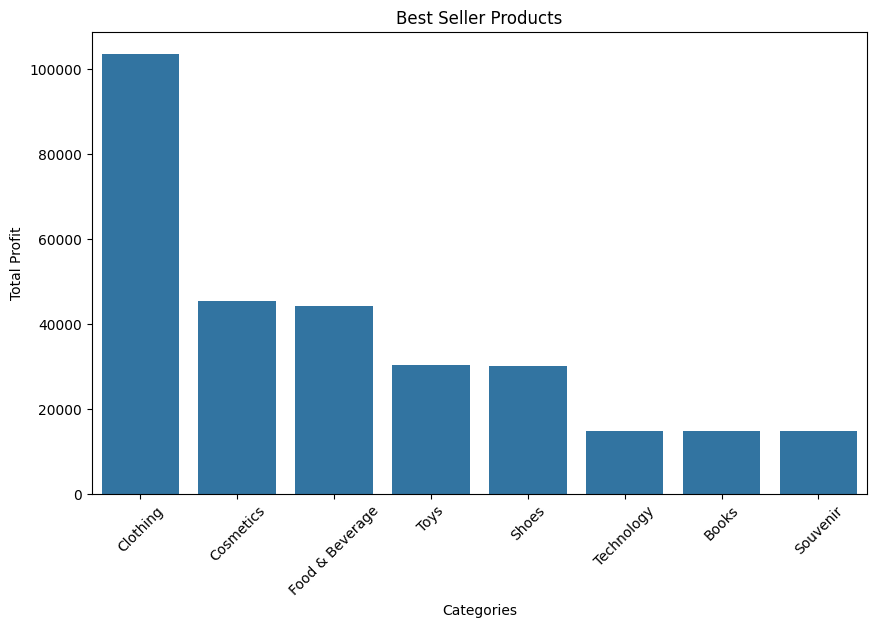

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=best_seller.index, y=best_seller.values)
plt.xlabel('Categories')
plt.ylabel('Total Profit')
plt.title('Best Seller Products')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['total_profit'] = df['price'] * df['quantity']

profit_ranking = df.groupby('category')['total_profit'].sum().sort_values(ascending=False)

print(profit_ranking.head(10))


category
Clothing           1.139968e+08
Shoes              6.655345e+07
Technology         5.786235e+07
Cosmetics          6.792863e+06
Toys               3.980426e+06
Food & Beverage    8.495351e+05
Books              8.345529e+05
Souvenir           6.358247e+05
Name: total_profit, dtype: float64


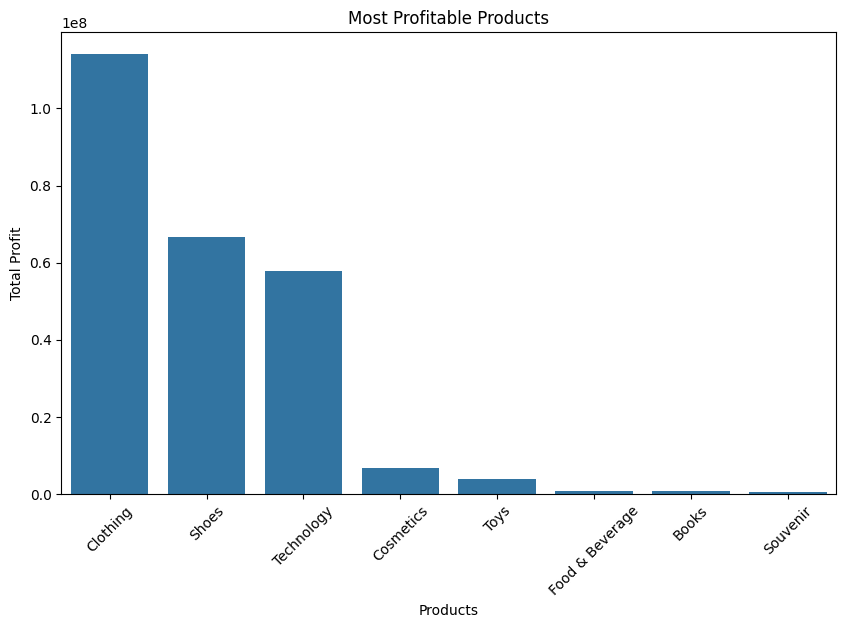

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=profit_ranking.index, y=profit_ranking.values)
plt.xlabel('Products')
plt.ylabel('Total Profit')
plt.title('Most Profitable Products')
plt.xticks(rotation=45)
plt.show()


In [ ]:
customer_ages= df.groupby('age')['quantity'].sum().sort_values(ascending=False)

print(customer_ages.head(10))

age
37    6217
22    6148
51    6014
64    5991
27    5969
24    5957
43    5928
30    5927
48    5918
38    5910
Name: quantity, dtype: int64


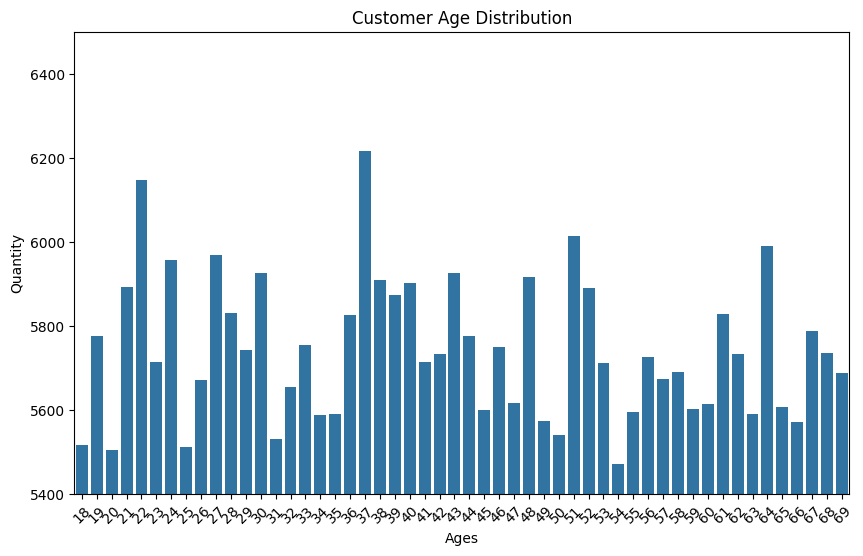

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=customer_ages.index, y=customer_ages.values)
plt.xlabel('Ages')
plt.ylabel('Quantity')
plt.ylim(5400, 6500)
plt.title('Customer Age Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18–25', '26–35', '36–45', '46–60', '60+']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
df['Profit'] = df['price'] * df['quantity']


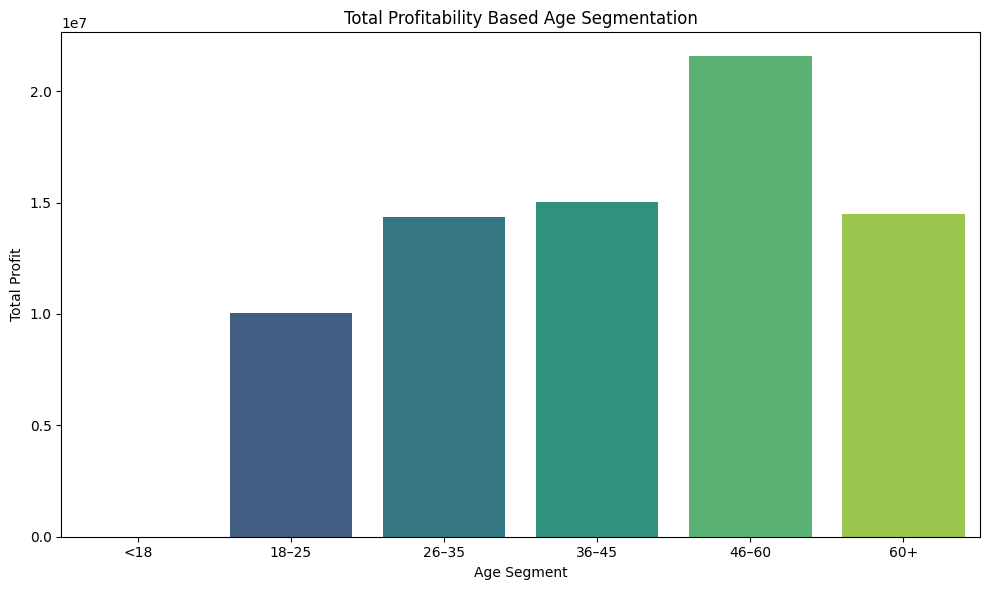

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=segment_analysis.groupby('AgeGroup', observed=True)['Profit'].sum().reset_index(),
            x='AgeGroup', y='Profit',hue='AgeGroup', palette='viridis')
plt.title('Total Profitability Based Age Segmentation')
plt.ylabel('Total Profit')
plt.xlabel('Age Segment')
plt.tight_layout()
plt.show()

<ipython-input-48-d71db25129d5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_analysis, x='gender', y='Profit', palette='magma')


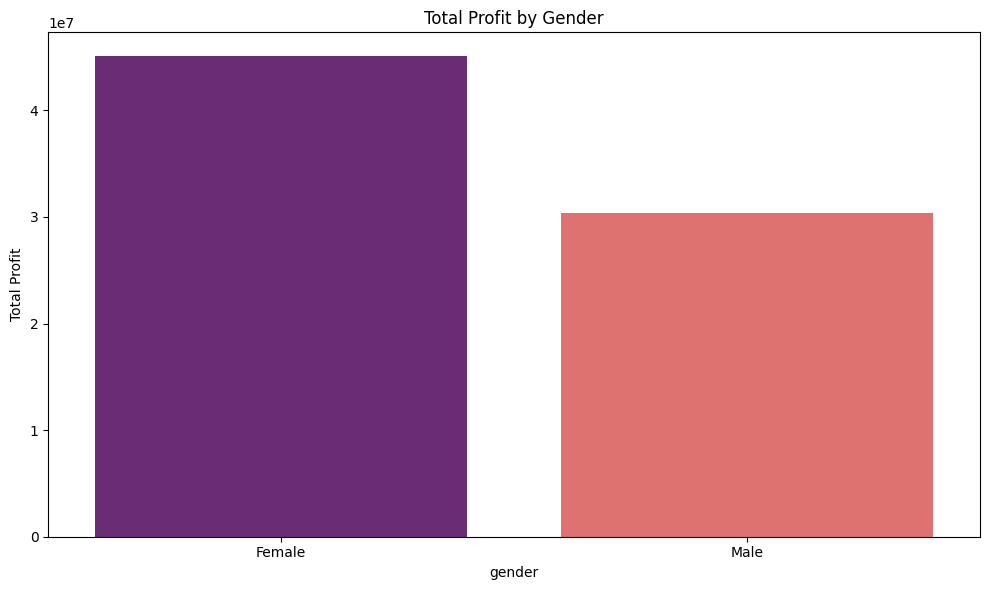

In [ ]:
# Cinsiyet bazında toplam satış ve kâr
gender_analysis = df.groupby('gender', observed=True).agg({
    'quantity': 'sum',
    'Profit': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_analysis, x='gender', y='Profit', palette='magma')
plt.title('Total Profit by Gender')
plt.xlabel('gender')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()


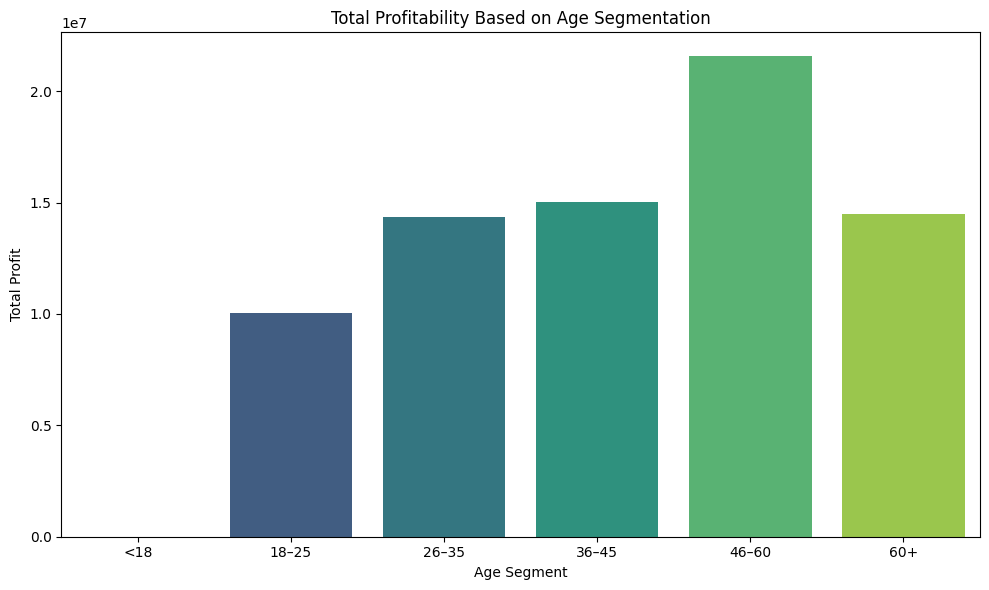

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=segment_analysis.groupby('AgeGroup', observed=True)['Profit'].sum().reset_index(),
    x='AgeGroup',
    y='Profit',
    hue='AgeGroup',
    palette='viridis',
    legend=False
)
plt.title('Total Profitability Based on Age Segmentation')
plt.ylabel('Total Profit')
plt.xlabel('Age Segment')
plt.tight_layout()
plt.show()


In [ ]:
segment_analysis['AgeGroup'].value_counts()


,count
AgeGroup,
<18,16
18–25,16
26–35,16
36–45,16
46–60,16
60+,16


<ipython-input-53-b1657be8665e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


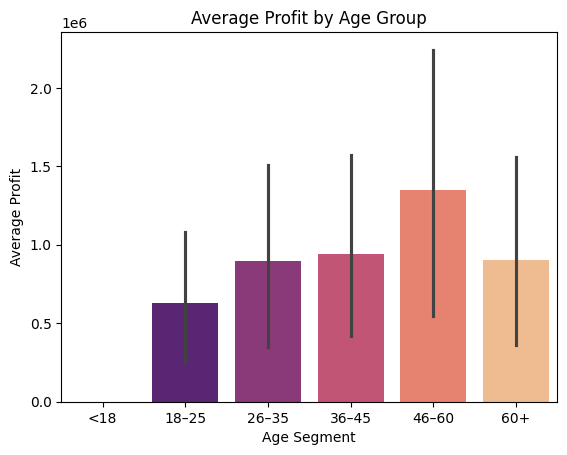

In [ ]:
sns.barplot(
    data=segment_analysis,
    x='AgeGroup',
    y='Profit',
    estimator='mean',
    palette='magma'
)
plt.title('Average Profit by Age Group')
plt.ylabel('Average Profit')
plt.xlabel('Age Segment')
plt.show()
